In [3]:
import numpy as np
from matplotlib import pyplot as plt

def trapz(fx: np.array, step: float) -> float:
    integral = step * (fx[0] / 2 + fx[-1]/2 + np.sum(fx[1:-1]) )
    return integral
    
fx = np.linspace(0, 1, 10)
trapz(fx, fx[1]-fx[0])

0.5

# MD - Simulation of liquid argon at the tripple point
$n=256$  
$\rho=0.84000$  
$dt=0.00500$  

$nt=      100000$   
$<t>= 0.695774$  
$<k>/n= 1.04366$  
$<u>/n=-6.08493$  
$e/n=-5.04126$  
$<p>=-7.31610\times 10^{2}$  
$c_v/n= 2.62583$  

        ntaskip=          10
        ntcskip=           5
   ncor/ntcskip=        2000
 ntorig/ntcskip=           1  

In [4]:
gr = np.loadtxt("mdlj_gr_comp.dat")
vacf = np.loadtxt("mdlj_vacf_comp.dat")

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-5-640577b941a3>:3: DeprecationWarning: invalid escape sequence \s
  ax.set(title="The pair correlation function $g(r)$", xlabel="$r/\sigma$", ylabel="g")


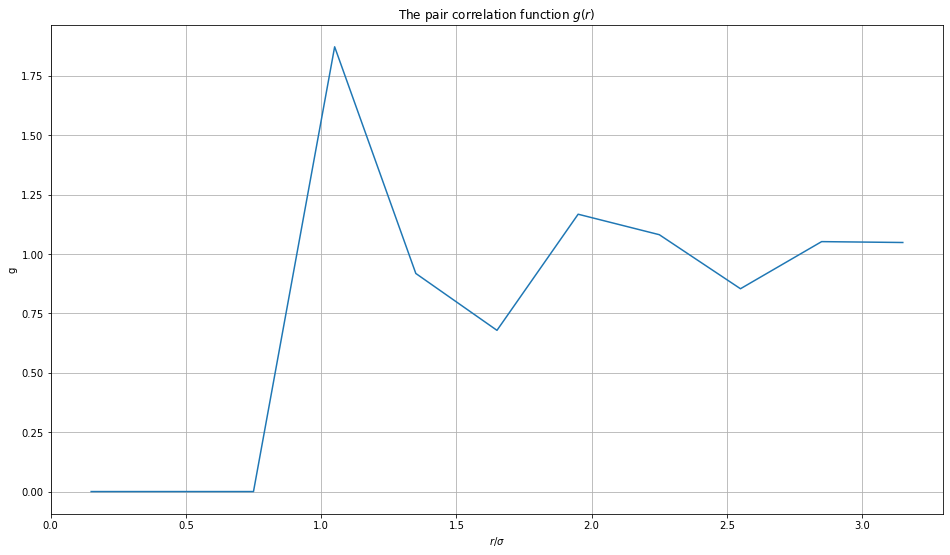

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(gr[:, 0], gr[:, 1])
ax.set(title="The pair correlation function $g(r)$", xlabel="$r/\sigma$", ylabel="g")
ax.grid()


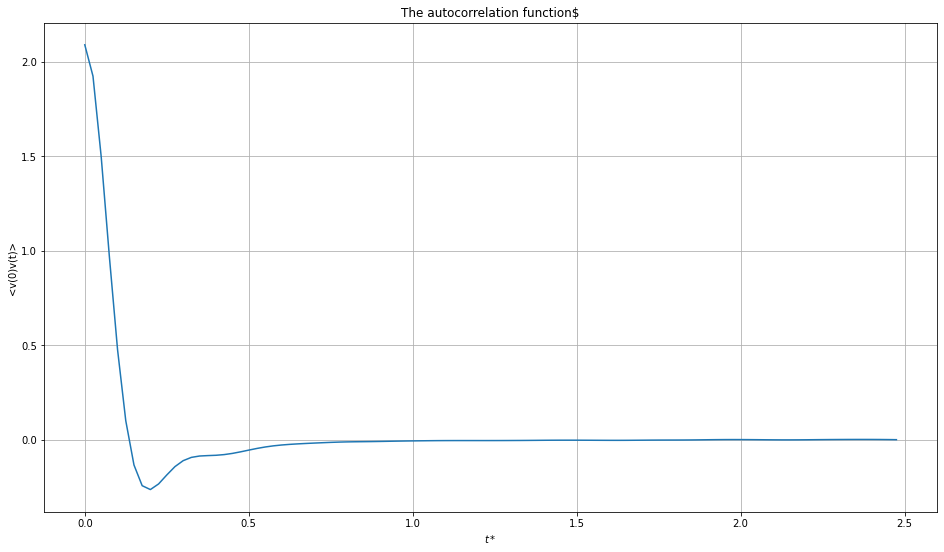

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(vacf[:100, 0], vacf[:100, 1])
ax.set(title="The autocorrelation function$", xlabel="$t*$", ylabel="<v(0)v(t)>")
ax.grid()

# MC - Simulation of liquid argon at the tripple point
$n=256$  
   $\rho=  0.84000$  
     $T=  0.70000$  
  $\Delta r=  0.03000$  
    $nT=      100000 (*    5)$  
  $accr= 8.98519E-01$  
 $<U>/N=-6.08484E+00$  
  $C_v/N= 2.74208E+00$  
     $p=-6.86014E-02$

In [7]:
gr_mc = np.loadtxt("amclj.dat")

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-8-00d6400a2d7b>:3: DeprecationWarning: invalid escape sequence \s
  ax.set(title="The pair correlation function $g(r)$", xlabel="$r/\sigma$", ylabel="g")


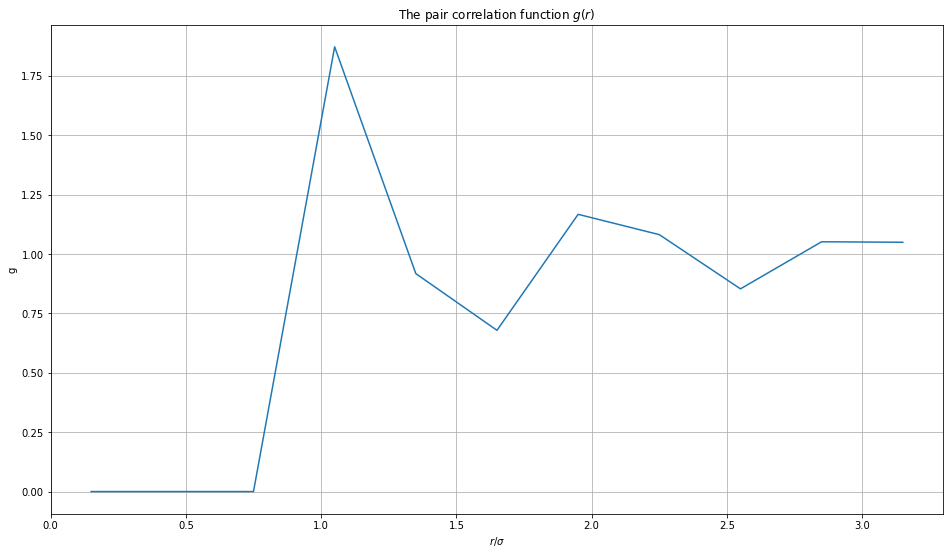

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(gr_mc[:, 0], gr_mc[:, 1])
ax.set(title="The pair correlation function $g(r)$", xlabel="$r/\sigma$", ylabel="g")
ax.grid()

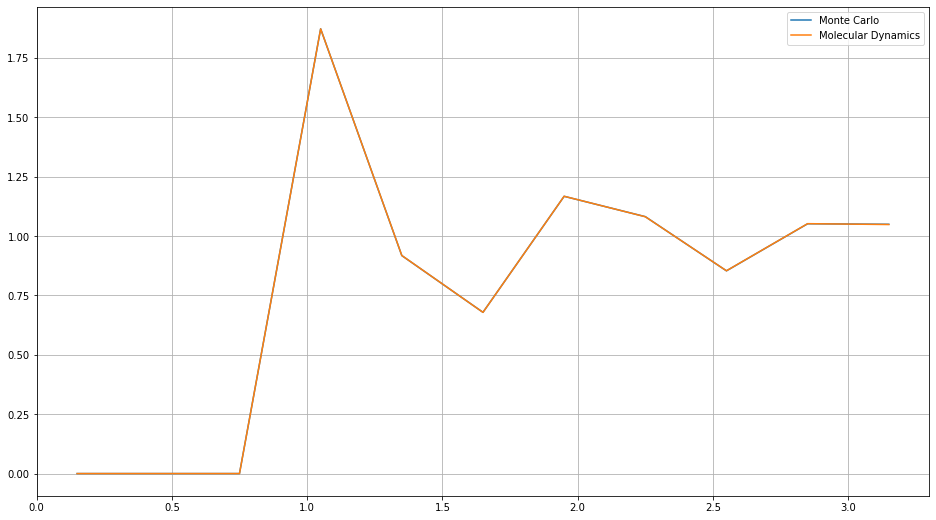

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(gr_mc[:, 0], gr_mc[:, 1])
ax.plot(gr[:, 0], gr[:, 1])
ax.grid()
plt.legend(("Monte Carlo", "Molecular Dynamics"))

So they agree perfectly with each other.  
For the other parameters, we have for the MD:  
$<U>/n=-6.08493$  
  $C_v/n= 2.62583$  
$<p>=-7.31610\times 10^{-2}$  

and for the MC:  
 $<U>/n=-6.08484$  
 $C_v/n= 2.74208$  
 $p=-6.86014\times 10^{-2}$
   
The average potential Energy per particle seems to agree fairly goot, while the heat capacity differs by about  $\approx$ 4%.   
The pressure is the has the most deviation at about $\approx$ 6%. But as said in the beginning, one should not rely to much on this pressure.

# Analysis of the influence of the timestep on the energy conservation
As reference $n=500$, $\rho=0.84$, $T = 0.7$ $dt = 0.005$ and 10.000 skips, after which the reference Energy was

In [10]:
E0 = -6.12732

In [18]:
cons = np.loadtxt("cons.dat")
dE = E0 - cons[:, 1]
dE_per_skip = dE / cons[:, 2]

<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<ipython-input-28-6cb4943e58c9>:3: DeprecationWarning: invalid escape sequence \D
  ax.set(title="Energy loss per skip", xlabel="$\Delta t$", ylabel="$\Delta E$/skip")
<ipython-input-28-6cb4943e58c9>:3: DeprecationWarning: invalid escape sequence \D
  ax.set(title="Energy loss per skip", xlabel="$\Delta t$", ylabel="$\Delta E$/skip")


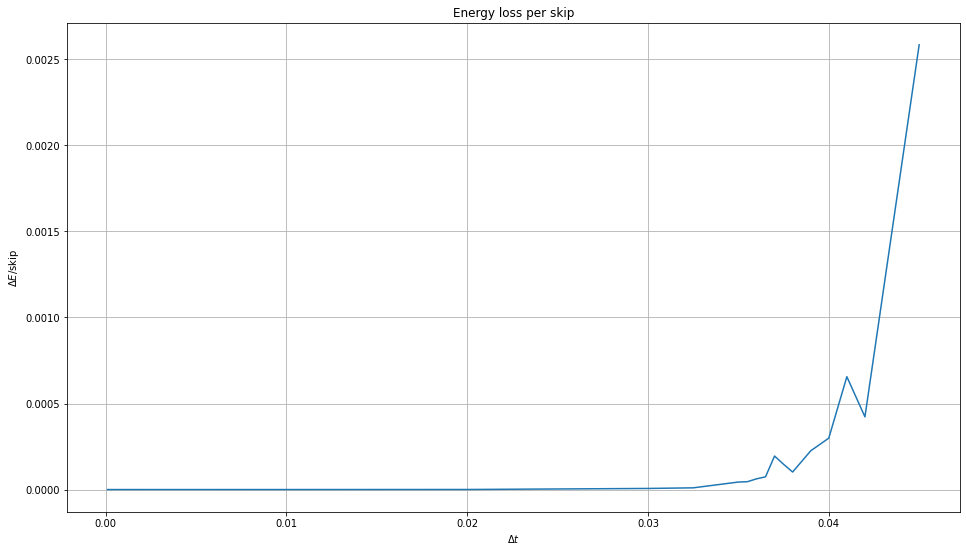

In [28]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(cons[:, 0], -dE_per_skip)
ax.set(title="Energy loss per skip", xlabel="$\Delta t$", ylabel="$\Delta E$/skip")
ax.grid()

In [29]:
dE_per_skip_time = dE_per_skip = dE / (cons[:, 2] * cons[:, 0])

<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<ipython-input-33-e681824db842>:3: DeprecationWarning: invalid escape sequence \D
  ax.set(title="Energy loss per simulation time", xlabel="$\Delta t$", ylabel="$\Delta E/n_{skip}*\Delta t$")
<ipython-input-33-e681824db842>:3: DeprecationWarning: invalid escape sequence \D
  ax.set(title="Energy loss per simulation time", xlabel="$\Delta t$", ylabel="$\Delta E/n_{skip}*\Delta t$")


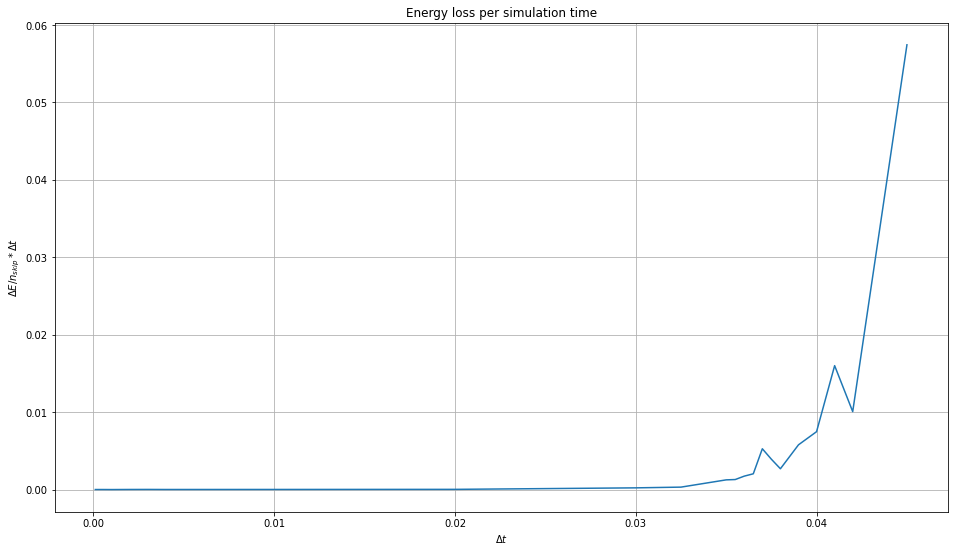

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(cons[:, 0], -dE_per_skip_time)
ax.set(title="Energy loss per simulation time", xlabel="$\Delta t$", ylabel="$\Delta E/n_{skip}*\Delta t$")
ax.grid()

So we see an exponentially increasing loss of total energy with increasing stepsize